<a href="https://colab.research.google.com/github/Sikandarh11/CodeClause-Data-Science-Internship-/blob/main/Task_1_(KMeans_Clustering_on_Customer_Segment_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
dataset = pd.read_excel("/content/Online Retail.xlsx")

In [4]:
dataset.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
484473,577531,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,5,2011-11-20 13:58:00,5.79,NaN,United Kingdom
71862,542216,22045,SPACEBOY GIFT WRAP,25,2011-01-26 12:29:00,0.42,14911.0,EIRE
444629,574737,22940,FELTCRAFT CHRISTMAS FAIRY,4,2011-11-06 15:53:00,4.25,14868.0,United Kingdom
205205,554718,21625,VINTAGE UNION JACK APRON,3,2011-05-26 11:16:00,6.95,12942.0,United Kingdom
313221,564476,21213,PACK OF 72 SKULL CAKE CASES,24,2011-08-25 12:57:00,0.55,12610.0,Italy
167341,550987,22116,METAL SIGN HIS DINNER IS SERVED,4,2011-04-21 18:10:00,1.63,NaN,United Kingdom
181052,552444,21166,COOK WITH WINE METAL SIGN,2,2011-05-09 13:10:00,2.08,17634.0,United Kingdom
428215,573415,23153,ZINC SWEETHEART WIRE LETTER RACK,2,2011-10-30 16:17:00,3.75,13607.0,United Kingdom
405073,571710,23176,ABC TREASURE BOOK BOX,8,2011-10-18 15:54:00,2.25,13032.0,United Kingdom
368496,568955,23175,REGENCY MILK JUG PINK,4,2011-09-29 15:40:00,3.25,13759.0,United Kingdom


In [5]:
dataset.shape

(541909, 8)

In [6]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [114]:
df = dataset.copy()
df.dropna(inplace = True)
df.isnull().sum(), df.shape

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 (406829, 8))

In [9]:
df.duplicated().sum()

5268

In [115]:
df = df.drop_duplicates()
df.shape

(401604, 8)

# **Basic Questions**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.7+ MB


In [153]:
column = dataset.columns
for col in column:
  print(col, " : ",dataset[col].unique().shape)

InvoiceNo  :  (25900,)
StockCode  :  (4070,)
Description  :  (4224,)
Quantity  :  (722,)
InvoiceDate  :  (23260,)
UnitPrice  :  (1630,)
CustomerID  :  (4373,)
Country  :  (38,)


In [116]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df = df.drop(['UnitPrice', 'Quantity'], axis =1)

In [80]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,20.34


# **Dealing with Date and Time**

In [117]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
#df = df.drop('InvoiceDate', axis=1)

In [82]:
df.head()

,InvoiceNo,StockCode,Description,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


# **EDA (Catagorical and Numerical Data)**

# Univarient & MultiVarient **bold text**

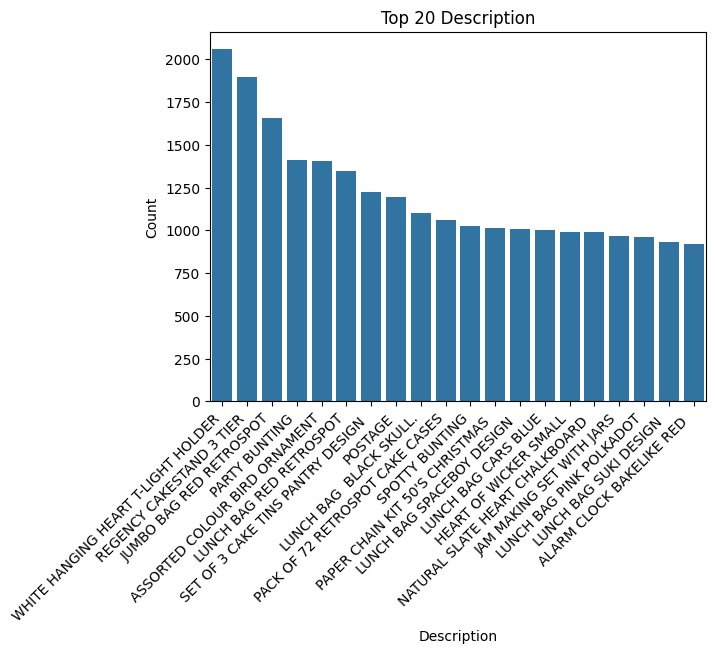

In [154]:
top =20
description = df['Description'].value_counts().nlargest(top)
sns.barplot(x=description.index, y=description.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 20 Description')
plt.show()

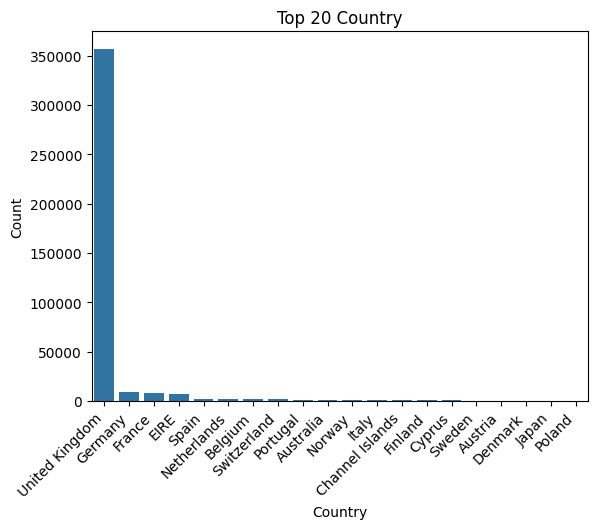

In [155]:
top =20
description = df['Country'].value_counts().nlargest(top)
sns.barplot(x=description.index, y=description.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 20 Country')

plt.show()

# **Feature Construction**

In [129]:
new_df = df.groupby('Description').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum',
                                            'CustomerID' : 'count',
                                            'StockCode' : 'count',
                                            'Country' : 'count'
                                       })
new_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,CustomerID,StockCode,Country
Description,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1,37,265.66,37,37,37
50'S CHRISTMAS GIFT BAG LARGE,0,110,2269.75,110,110,110
DOLLY GIRL BEAKER,0,137,2745.75,137,137,137
I LOVE LONDON MINI BACKPACK,1,69,1449.85,69,69,69
I LOVE LONDON MINI RUCKSACK,64,1,4.15,1,1,1


# **Standarderizing the Data**

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)
scaled_data = pd.DataFrame(scaled_data, columns=new_df.columns)
scaled_data.head()

,InvoiceDate,InvoiceNo,TotalPrice,CustomerID,StockCode,Country
0,-0.555485,-0.413144,-0.344112,-0.413144,-0.413144,-0.413144
1,-0.566092,0.043257,0.026814,0.043257,0.043257,0.043257
2,-0.566092,0.212063,0.114914,0.212063,0.212063,0.212063
3,-0.555485,-0.213077,-0.124937,-0.213077,-0.213077,-0.213077
4,0.112786,-0.638218,-0.392514,-0.638218,-0.638218,-0.638218


In [135]:
import plotly.express as px
fig = px.scatter_3d(scaled_data, x='TotalPrice', y='InvoiceNo', z = 'InvoiceDate')
fig.show()

# **KMeans Clustering using Elbow method**

In [137]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

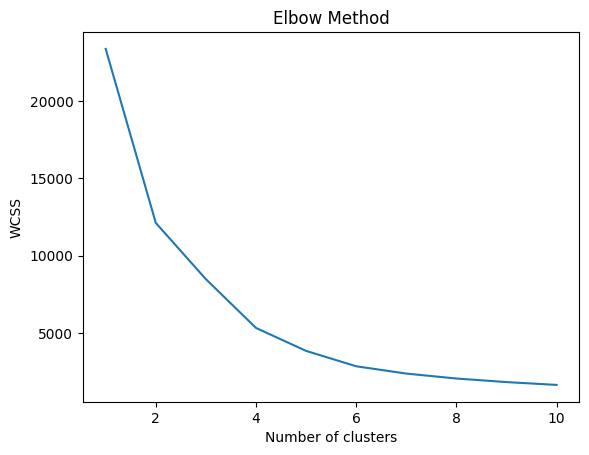

In [138]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [143]:
Kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y = Kmeans.fit_predict(scaled_data)
x = scaled_data.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [157]:
scaled_data['Cluster'] = y
scaled_data.head()

,InvoiceDate,InvoiceNo,TotalPrice,CustomerID,StockCode,Country,Cluster
0,-0.555485,-0.413144,-0.344112,-0.413144,-0.413144,-0.413144,0
1,-0.566092,0.043257,0.026814,0.043257,0.043257,0.043257,0
2,-0.566092,0.212063,0.114914,0.212063,0.212063,0.212063,0
3,-0.555485,-0.213077,-0.124937,-0.213077,-0.213077,-0.213077,0
4,0.112786,-0.638218,-0.392514,-0.638218,-0.638218,-0.638218,0


In [158]:
fig = px.scatter_3d(scaled_data, x='TotalPrice', y='Cluster', z = 'InvoiceDate')
fig.show()